In [ ]:
# 載入套件
import re
import csv
import jieba
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
jieba.set_dictionary('dict.txt')
jieba.load_userdict("user.txt")


In [2]:
#載入資料
num,question=[],[]
DATASET_DIR = 'Nantou.csv'
with open(DATASET_DIR, encoding='utf8') as f:
    dataset = csv.reader(f)
    for i in dataset:
        num.append(i[0])
        question.append(i[1])
STOP_WORDS_DIR = 'stop.txt'
with open(STOP_WORDS_DIR, encoding='utf8') as f:
    stop_words = f.read().splitlines() 

In [3]:
#將資料清洗到只剩中文
def clean_text(text_string):
    text_string = re.sub(r'[^\u4e00-\u9fa5]+', '', text_string)
    return(text_string)

question=[clean_text(i) for i in question]

In [4]:
all_terms = []
def preprocess(item):  ##定義前處理的function
    seg=' '.join(t for t in jieba.cut(item,cut_all=False) if t not in stop_words and len(t)>1)
    terms = [t for t in jieba.cut(item,cut_all=False) if t not in stop_words and len(t)>1]
    all_terms.extend(terms)  ## 收集所有出現過的字
    return terms
seg_question = [preprocess(i) for i in question]

In [6]:
#存取資料
with open('all.txt', 'wt',encoding="utf-8") as w_file:
        for i in all_terms:
            w_file.write(i + "\n")  

In [8]:
#計算每個詞的頻率
amount,item=[],[]
counter =Counter(all_terms)
for i ,v in enumerate(counter.most_common()):
    amount.append(v[1])
    item.append(v[0])

In [9]:
#將詞頻輸出
with open('amount.txt', 'wt',encoding="utf-8") as w_file:
        for i in amount:
            w_file.write(str(i) + "\n")

with open('item.txt', 'wt',encoding="utf-8") as w_file:
        for i in item:
            w_file.write(i + "\n") 

In [10]:
fre_dict=dict(counter.most_common())

In [12]:
#將文字轉換為數字型態
model = Word2Vec(seg_question,sg=1, min_count=8,size=100)#只取詞頻8以上的詞，每個詞變成一百維
X = model[model.wv.vocab]
words = list(model.wv.vocab)
len(words)

C:\Users\User\AppData\Local\conda\conda\envs\cosmetic\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


61

In [13]:
#將維度轉為二維
pca = PCA(n_components=2)
X_embedded=pca.fit_transform(X)
np.savetxt('embediing_easya',X_embedded)
X_embedded

array([[-4.0943278e-03,  4.0333522e-03],
       [ 5.9033013e-03,  3.7404408e-03],
       [-6.6468762e-03, -4.1715037e-03],
       [-1.7624909e-04,  1.1172536e-02],
       [ 9.8350467e-03,  7.6037021e-03],
       [ 3.3418143e-03, -5.9762620e-04],
       [ 6.5296590e-05,  3.6998547e-03],
       [-2.7149520e-03, -7.7546686e-03],
       [-1.4797742e-02,  1.4442445e-03],
       [-3.0416960e-03,  5.8191335e-03],
       [-1.1781562e-03, -1.2328678e-02],
       [ 1.9000277e-03, -1.1087379e-02],
       [-8.1337718e-03, -1.0636292e-03],
       [ 4.5647779e-03,  2.8085744e-03],
       [-5.9727859e-03, -9.3510014e-04],
       [-8.7097064e-03, -6.5363962e-03],
       [ 4.8022627e-04, -2.1284956e-03],
       [ 2.3027596e-03,  1.1083798e-02],
       [-3.6491484e-03,  1.0106526e-02],
       [-1.0864738e-02,  4.6425522e-03],
       [ 8.0915531e-03, -3.3043337e-04],
       [ 3.0129263e-03,  3.8425650e-03],
       [ 1.0131249e-02,  1.3918832e-03],
       [-2.3787303e-03, -9.6205482e-03],
       [-3.39565

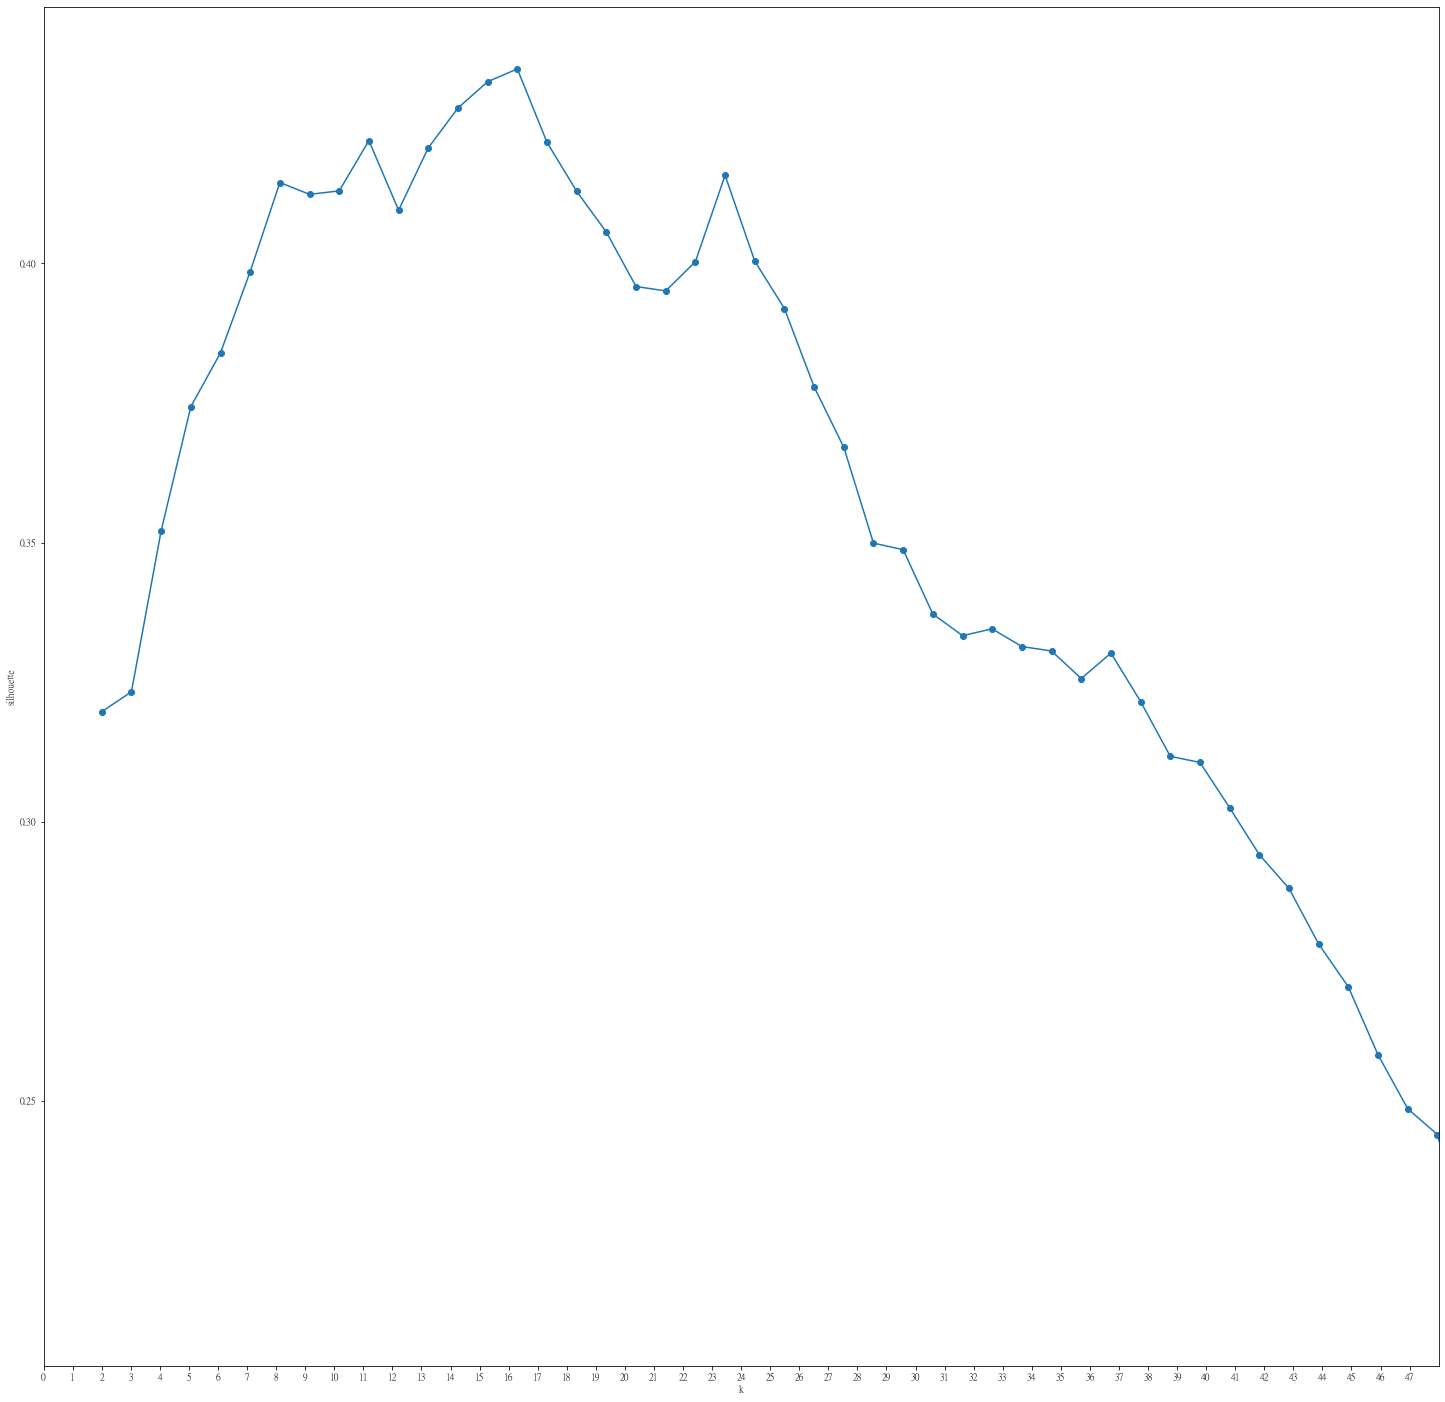

In [15]:
#利用輪廓法幫忙找k值
silhouette_avgs = []
for k in range(2,50):
    hierarchy = AgglomerativeClustering(n_clusters=k).fit_predict(X_embedded)  # 构造聚类器
    silhouette = silhouette_score(X_embedded, hierarchy)
    silhouette_avgs.append(silhouette)
plt.figure(figsize=(25,25))
X = np.linspace(2,50,48)
plt.xlabel('k')
plt.ylabel('silhouette')
plt.xlim([0,48])
plt.xticks(range(48))
plt.plot(X,silhouette_avgs,'o-')
plt.show()

In [16]:
silhouette_avgs.index(max(silhouette_avgs))

14

In [17]:
hierarchy = AgglomerativeClustering(n_clusters=15).fit_predict(X_embedded)
print(hierarchy)
classifer =Counter(hierarchy)
classifer1 = sorted(classifer.items())
classifer1

[ 6 12  9 10  1  4  6  2  0  6  2  2  3 12  3  9  5 10 11  0  8 12  8  2
  3  6  0 13  3  2 12  4  2  0 12  2  5  6  4  6  2  5  3  6 13  5  9  0
 10  6  8  4 11  5  7 12  2 14  7 10  1]


[(0, 5),
 (1, 2),
 (2, 9),
 (3, 5),
 (4, 4),
 (5, 5),
 (6, 8),
 (7, 2),
 (8, 3),
 (9, 3),
 (10, 4),
 (11, 2),
 (12, 6),
 (13, 2),
 (14, 1)]

In [18]:
 print(np.where(hierarchy==11))

(array([18, 52], dtype=int64),)


In [19]:
for x in range(15):
    for i in np.where(hierarchy==x):
        print('第'+str(x+1)+'群:')
        for j ,v in enumerate(i):
            if j==len(i)-1:
                print(words[v]+'('+str(fre_dict[words[v]])+')')
            else:
                print(words[v]+'('+str(fre_dict[words[v]])+')',end='')
        

第1群:
派員(18)查察(14)民眾(8)行車(8)違建(9)
第2群:
佔用(13)修繕(8)
第3群:
盡速(9)車輛(22)縣府(18)反映(26)危險(20)設置(19)路人(14)路面(13)坑洞(11)
第4群:
協助(16)路燈(10)南投(10)建議(8)政府(8)
第5群:
相關(59)路口(10)居民(11)公司(9)
第6群:
路段(9)安全(18)人員(10)草屯鎮(14)申請(12)
第7群:
埔里鎮(16)單位(86)影響(26)車子(9)態度(8)希望(12)檢舉(11)交通(10)
第8群:
南投縣(23)損害(8)
第9群:
紅綠燈(19)竹山鎮(18)中山路(8)
第10群:
住戶(15)南投市(26)使用(15)
第11群:
店家(10)停車(8)土地(12)清除(9)
第12群:
改善(15)機車(8)
第13群:
道路(33)建築(27)號誌(9)施工(11)環境(11)不良(8)
第14群:
時間(13)無法(17)
第15群:
加班(8)


C:\Users\User\AppData\Local\conda\conda\envs\cosmetic\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\AppData\Local\conda\conda\envs\cosmetic\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


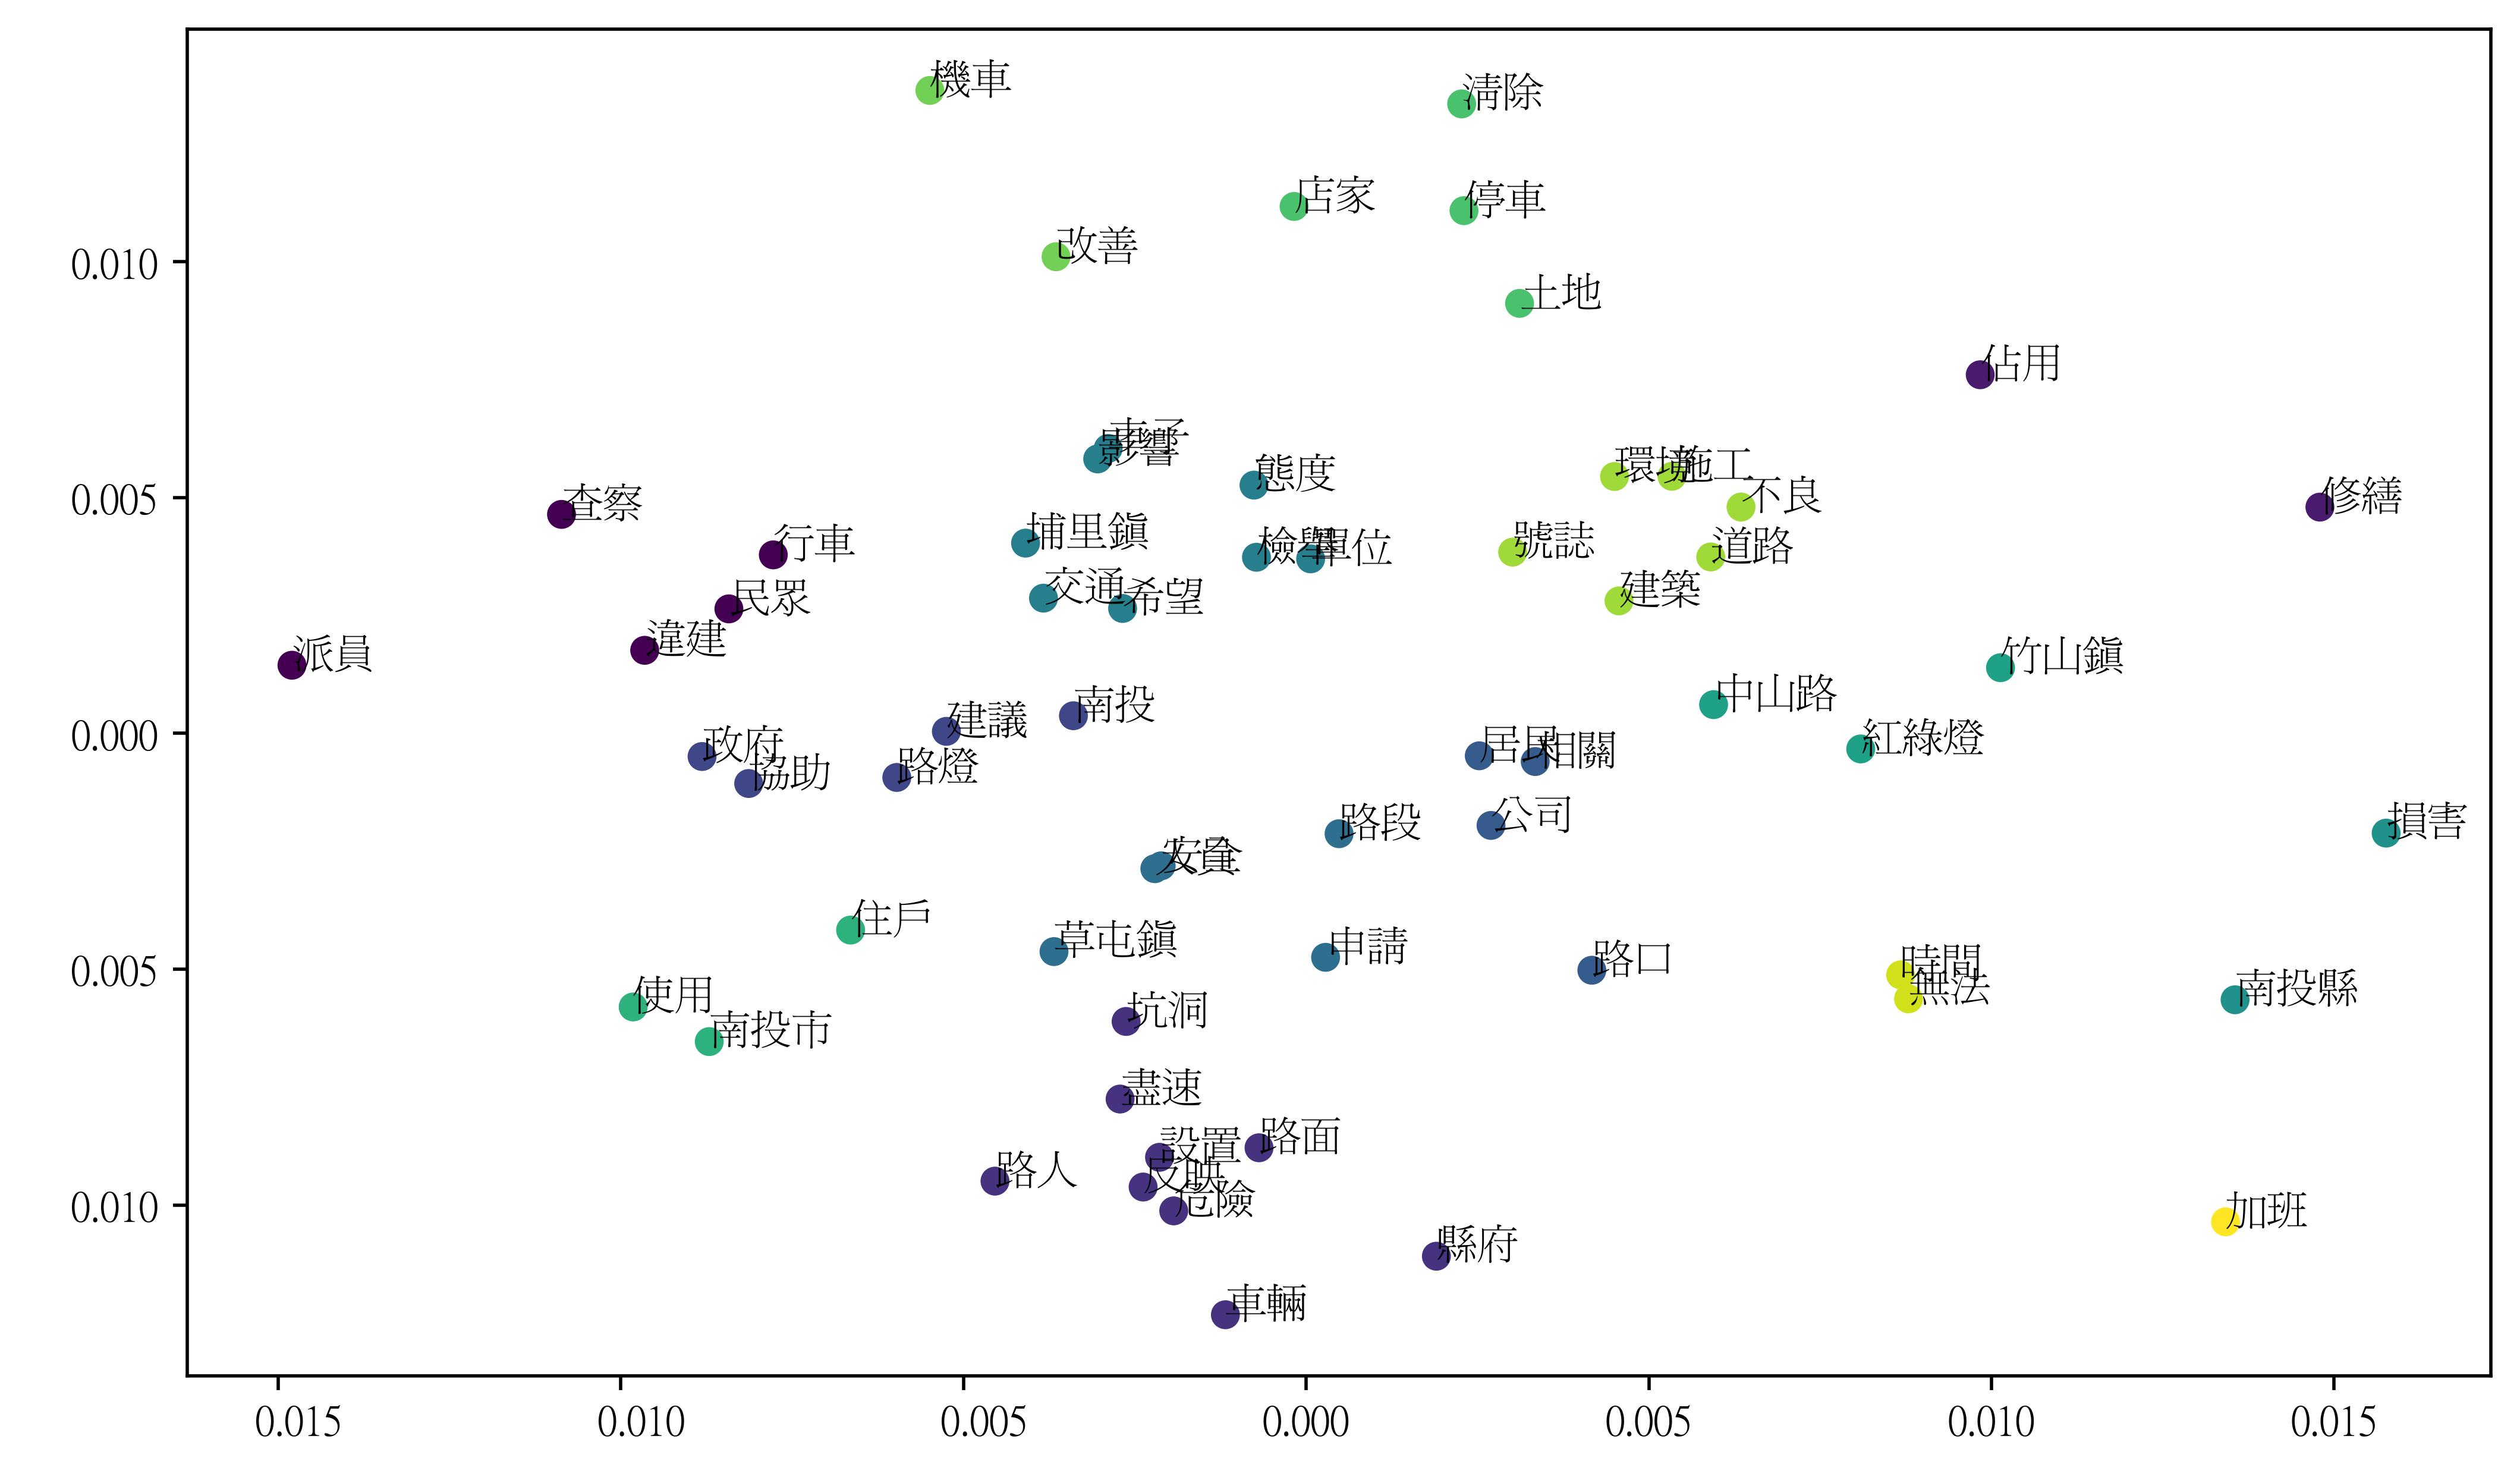

In [20]:
plt.figure(figsize=(10, 6),dpi=500)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=hierarchy)

for i, word in enumerate(words):
    plt.annotate(word, xy=(X_embedded[i, 0], X_embedded[i, 1]))
plt.savefig('分群圖.png')
plt.show()
